**Step 1**: Importing libraries and Exploring the Dataset.

**Step 2**: Definining Exploratory Data Analysis with an overview of the whole project .

**Step 3**: Checking missing values and Outliers

**Step 4**: Creating visual methods to analyze the data.

**Step 5**: Making Data Preprossing & Cleaning

**Step 6**: Feature transformation

**Step 7**: Features Scalling

**Step 8**: creat a model that fits the data

**Step 9**: creating an accurecy table

##Step 1: Importing libraries and Exploring the Dataset

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#For Fitting
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

%matplotlib inline
#ignore any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/data.csv")

In [3]:
df.shape

(4600, 18)

##Step 2: Definining Exploratory Data Analysis with an overview of the whole project

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


##Step 3: Checking missing values , Outliers & duplicates

In [8]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [12]:
# check outliers
columns = ['price', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in price: 240
Number of outliers in sqft_living: 76
Number of outliers in sqft_lot: 486
Number of outliers in sqft_above: 73
Number of outliers in sqft_basement: 35


In [13]:
df.shape

(3690, 18)

In [14]:
print(df['view'].value_counts())
print(50*'-')
print(df['waterfront'].value_counts())
print(50*'-')
print(df['bathrooms'].value_counts())
print(50*'-')
print(df['bedrooms'].value_counts())
print(50*'-')
print(df['floors'].value_counts())
print(50*'-')
print(df['condition'].value_counts())

0    3448
2     134
1      49
3      41
4      18
Name: view, dtype: int64
--------------------------------------------------
0    3685
1       5
Name: waterfront, dtype: int64
--------------------------------------------------
2.50    967
1.00    698
1.75    547
2.00    378
2.25    341
1.50    265
2.75    208
3.00     99
3.50     75
3.25     68
3.75     13
0.75     12
4.00      6
4.25      5
1.25      3
4.50      2
5.25      1
5.00      1
0.00      1
Name: bathrooms, dtype: int64
--------------------------------------------------
3.0    1767
4.0    1114
2.0     519
5.0     215
6.0      34
1.0      34
7.0       4
9.0       1
0.0       1
8.0       1
Name: bedrooms, dtype: int64
--------------------------------------------------
1.0    1854
2.0    1331
1.5     366
3.0     117
2.5      20
3.5       2
Name: floors, dtype: int64
--------------------------------------------------
3    2306
4    1007
5     353
2      21
1       3
Name: condition, dtype: int64


In [19]:
(df['price']==0).value_counts()

False    3659
True       31
Name: price, dtype: int64

**Numerical Columns:**

price, bedrooms, bathrooms,sqft_living , sqft_lot , floors , waterfront , view
, condition , sqft_above , sqft_basement , yr_built , yr_renovated

**Object Columns:**

date , city , country , statzip.

**Our problems in data:**

no duplicates , no nulls

found outliers

found object columns

##Step 4: Creating visual methods to analyze the data

<Axes: >

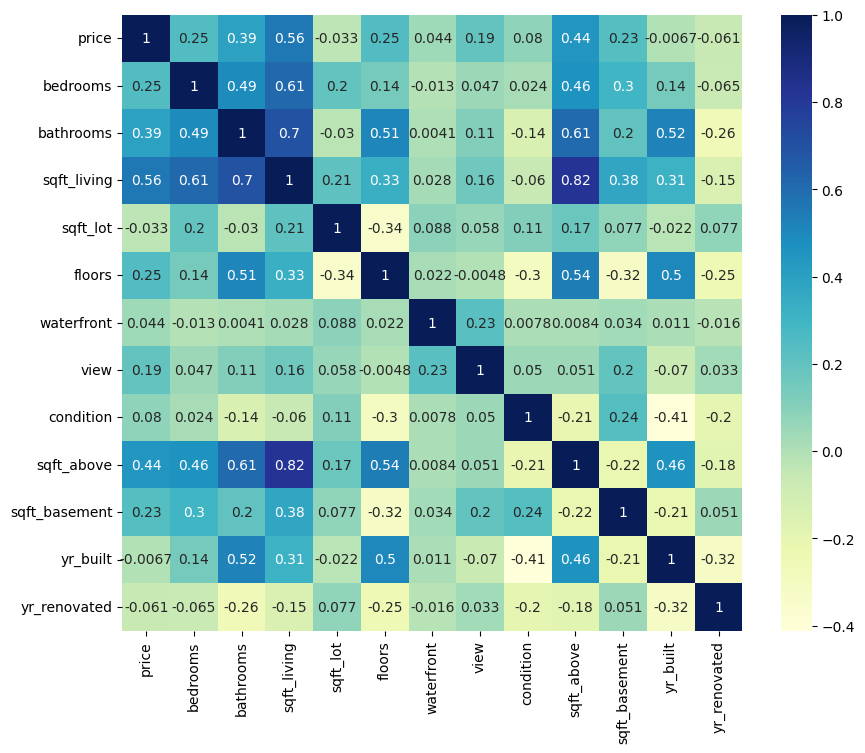

In [20]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
cor = df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

In [18]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.245422,0.335528,0.555575,-0.034114,0.208530,0.044120,0.195214,0.081656,0.440394,0.235127,-0.009040,-0.059663
bedrooms,0.245422,1.000000,0.431447,0.612402,0.197816,0.116397,-0.012479,0.047045,0.024782,0.461552,0.296555,0.143158,-0.064081
bathrooms,0.335528,0.431447,1.000000,0.598212,-0.059426,0.479994,0.008233,0.095903,-0.132039,0.529560,0.163114,0.443016,-0.227751
sqft_living,0.555575,0.612402,0.598212,1.000000,0.210548,0.319883,0.027981,0.166377,-0.057728,0.819808,0.376477,0.309188,-0.144229
sqft_lot,-0.034114,0.197816,-0.059426,0.210548,1.000000,-0.301250,0.088310,0.058467,0.108599,0.173092,0.077368,-0.022321,0.077986
floors,0.208530,0.116397,0.479994,0.319883,-0.301250,1.000000,0.024518,-0.017375,-0.329085,0.535813,-0.320044,0.596237,-0.262640
waterfront,0.044120,-0.012479,0.008233,0.027981,0.088310,0.024518,1.000000,0.226327,0.007776,0.008609,0.033666,0.011458,-0.015853
view,0.195214,0.047045,0.095903,0.166377,0.058467,-0.017375,0.226327,1.000000,0.049719,0.052272,0.198414,-0.069789,0.033238
condition,0.081656,0.024782,-0.132039,-0.057728,0.108599,-0.329085,0.007776,0.049719,1.000000,-0.207250,0.235682,-0.410810,-0.196301
sqft_above,0.440394,0.461552,0.529560,0.819808,0.173092,0.535813,0.008609,0.052272,-0.207250,1.000000,-0.220681,0.458827,-0.184363


<Axes: xlabel='sqft_lot'>

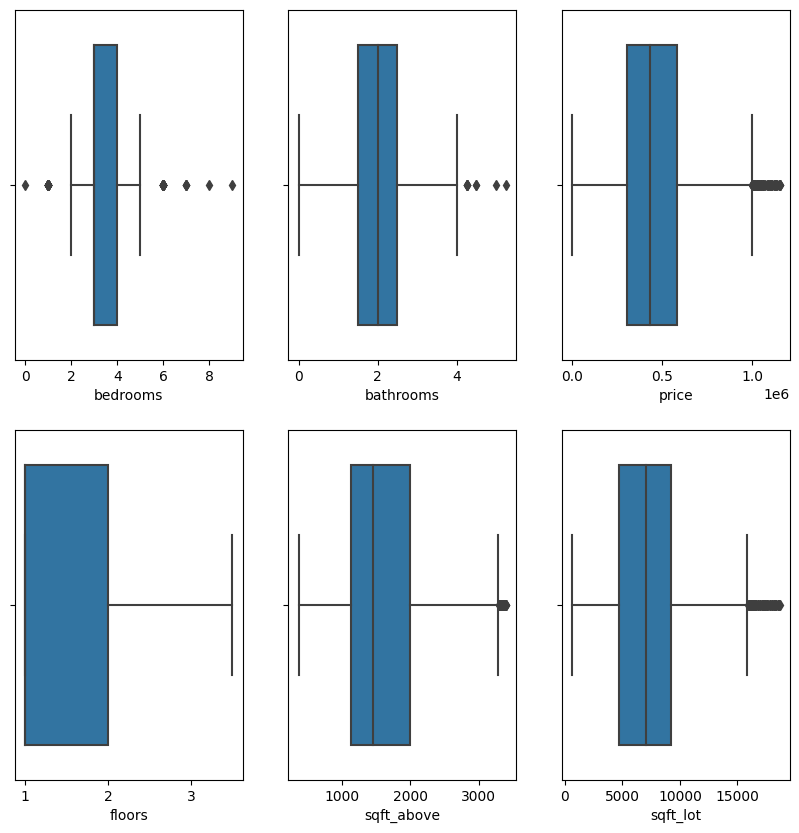

In [21]:
fig,ax = plt.subplots(2,3,figsize=(10,10))
sns.boxplot(x='bedrooms',data=df,ax=ax[0][0])
sns.boxplot(x='bathrooms',data=df,ax=ax[0][1])
sns.boxplot(x='price',data=df,ax=ax[0][2])
sns.boxplot(x='floors',data=df,ax=ax[1][0])
sns.boxplot(x='sqft_above',data=df,ax=ax[1][1])
sns.boxplot(x='sqft_lot',data=df,ax=ax[1][2])

<Axes: xlabel='sqft_above', ylabel='Density'>

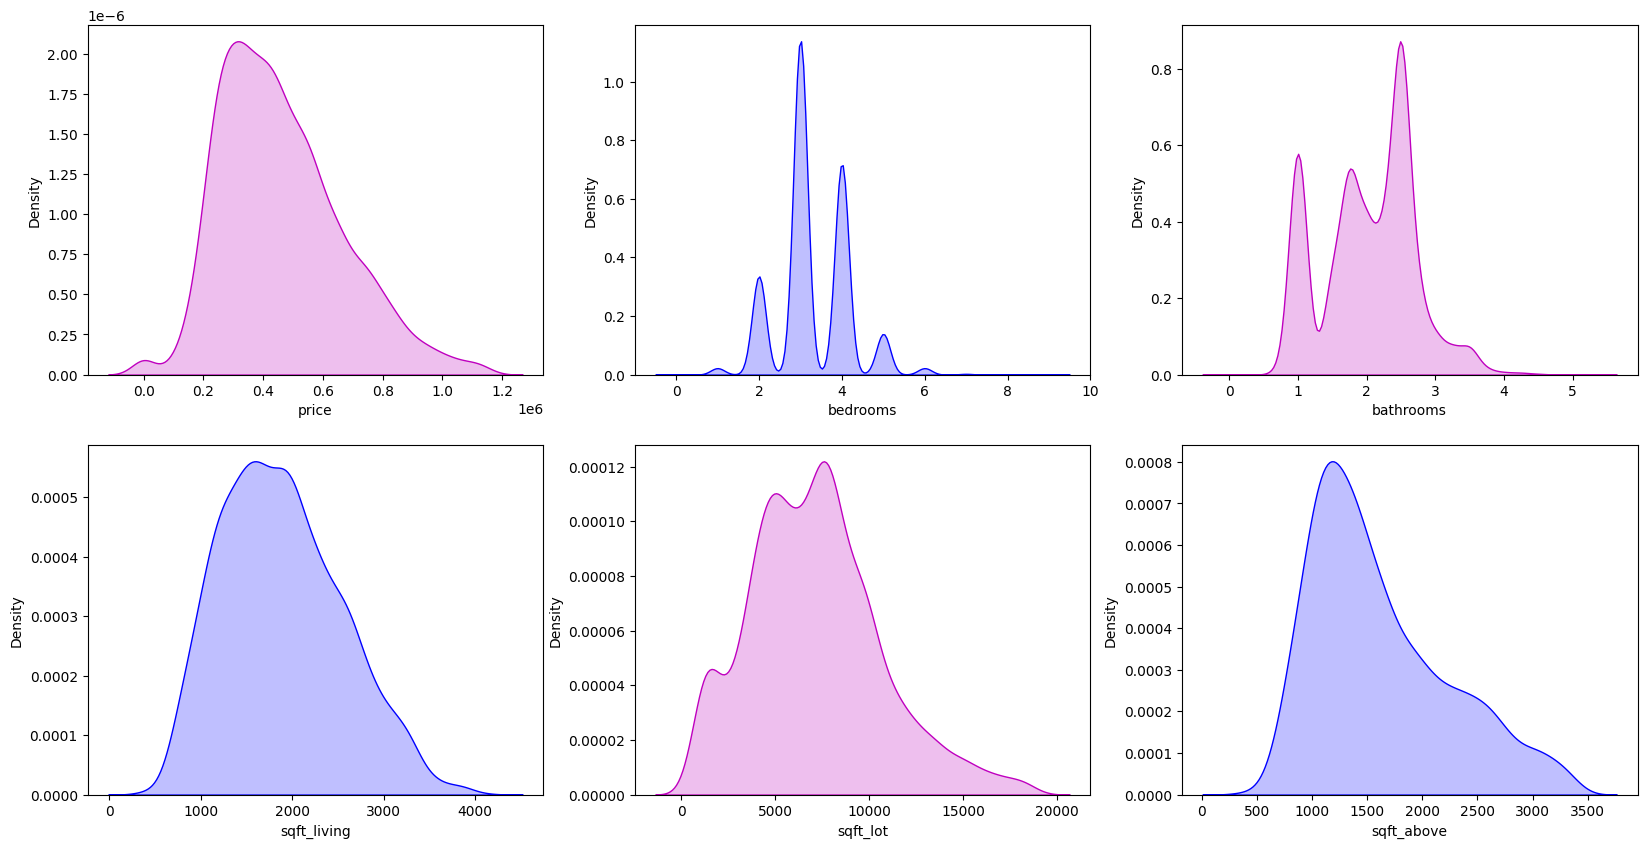

In [22]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
sns.kdeplot(df['price'], shade=True, color='m',ax=ax[0][0])
sns.kdeplot(df['bedrooms'], shade=True, color='b',ax=ax[0][1])
sns.kdeplot(df['bathrooms'], shade=True, color='m',ax=ax[0][2])
sns.kdeplot(df['sqft_living'], shade=True, color='b',ax=ax[1][0])
sns.kdeplot(df['sqft_lot'], shade=True, color='m',ax=ax[1][1])
sns.kdeplot(df['sqft_above'], shade=True, color='b',ax=ax[1][2])

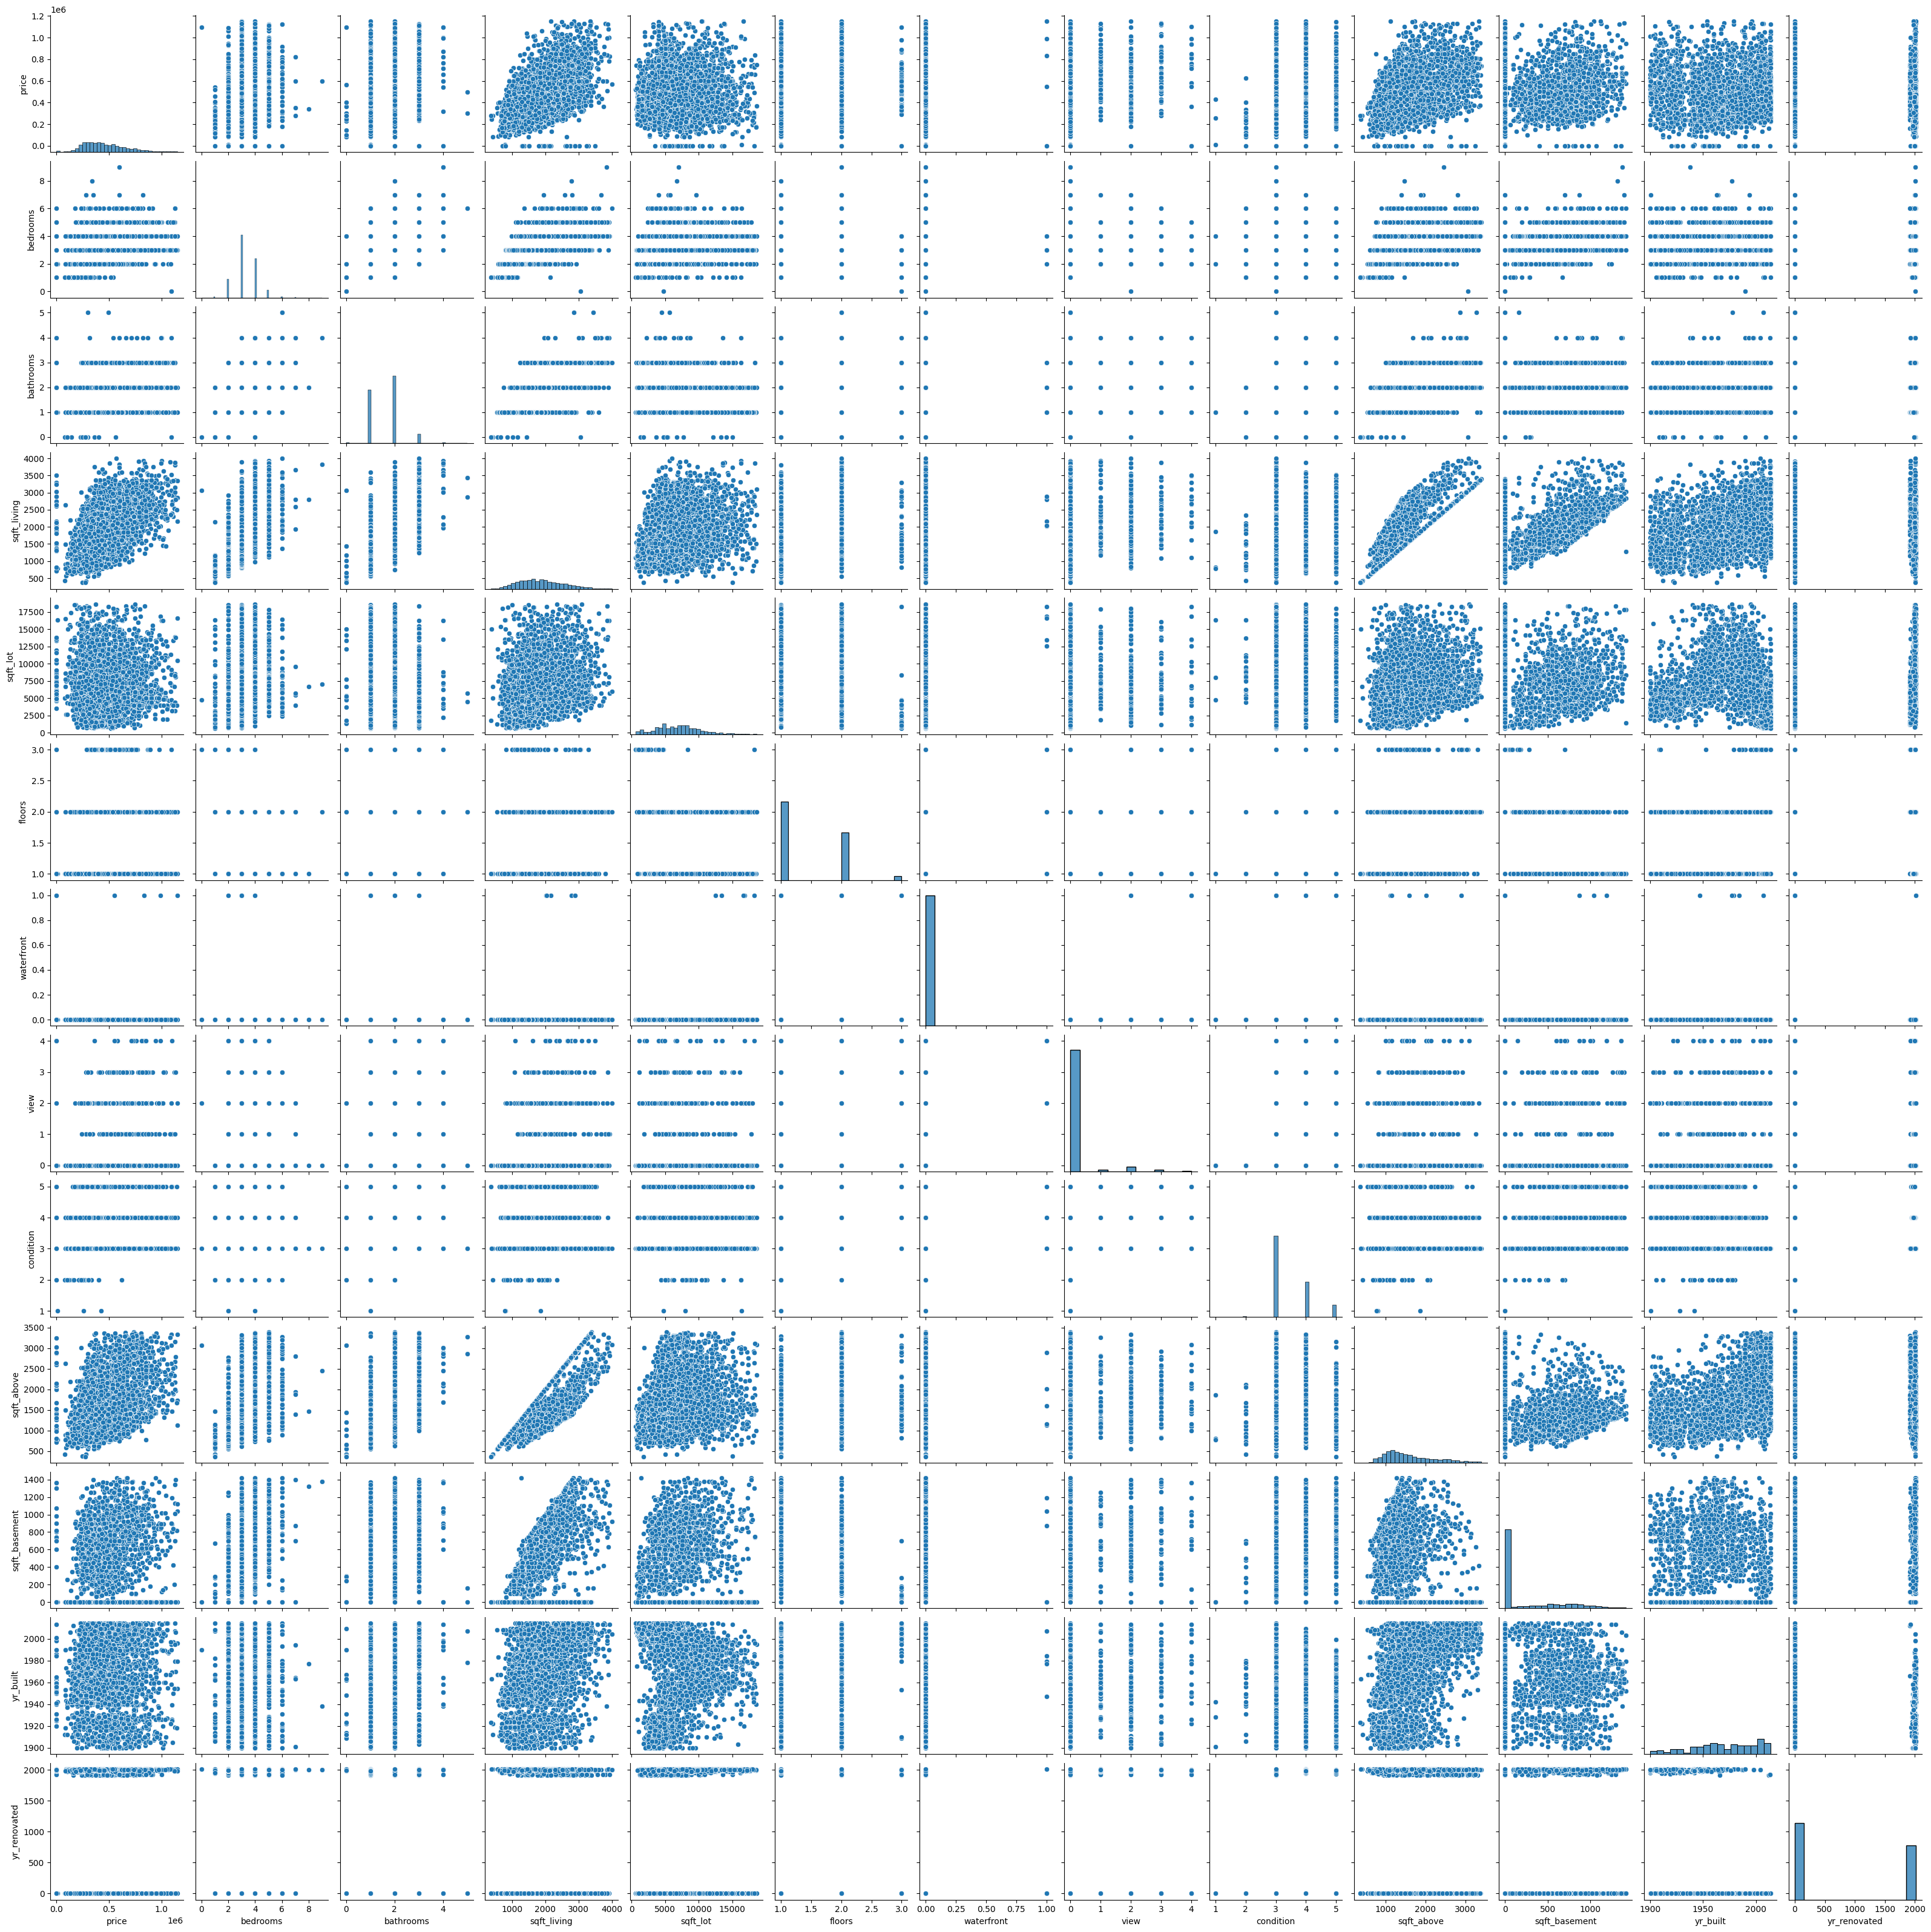

In [21]:
sns.pairplot(df)

Analysis on number of bedroom feature

<Axes: xlabel='bedrooms', ylabel='price'>

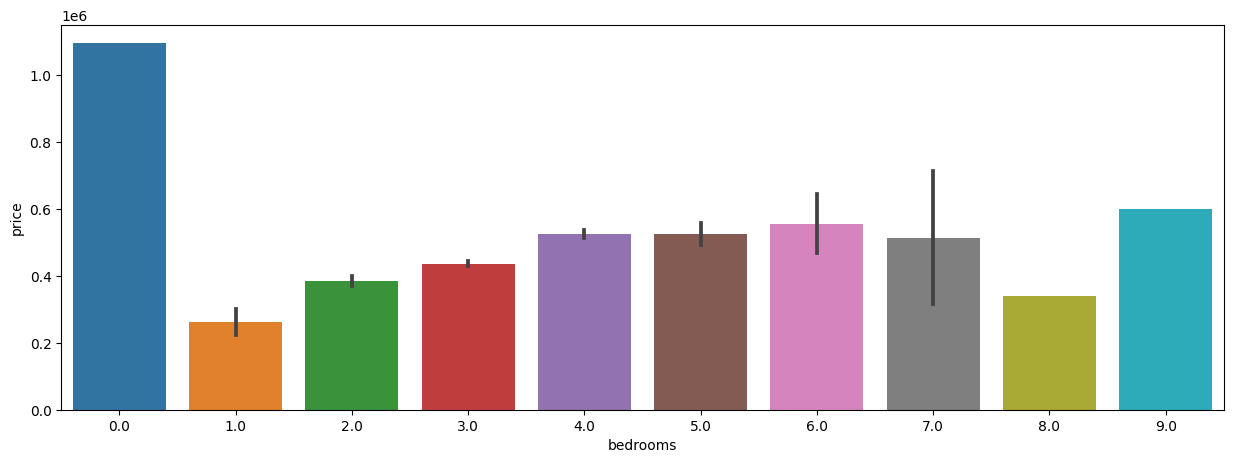

In [23]:
#corellation of price with no. of bedrooms
mysize = (15, 5)
fig, ax = plt.subplots(figsize=mysize)
sns.barplot(x = df.bedrooms, y = df.price)

Analysis on bathroom feature

<Axes: xlabel='bathrooms', ylabel='price'>

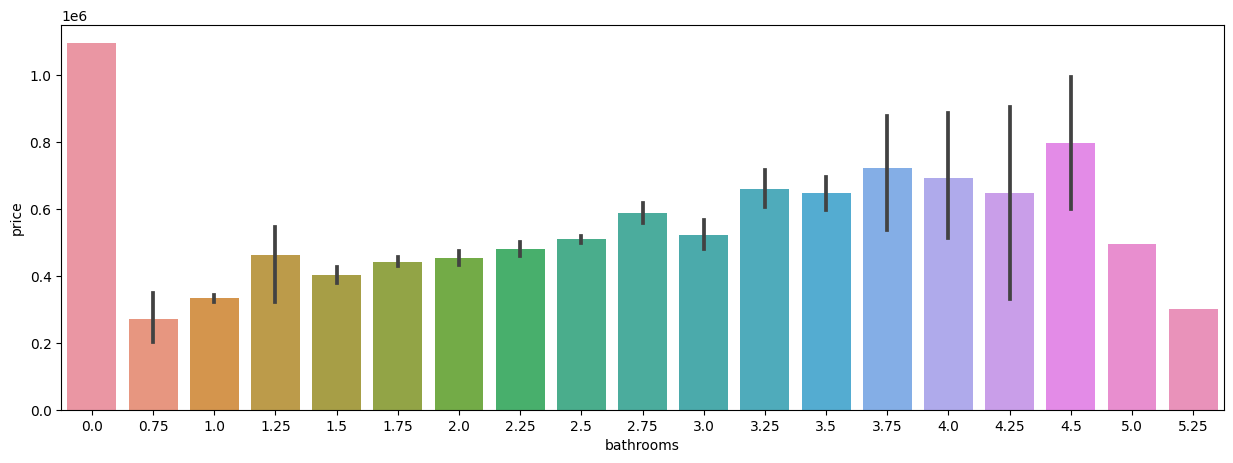

In [24]:
size = (15, 5)
fig, ax = plt.subplots(figsize=size)
sns.barplot(x = df.bathrooms, y = df.price)

##Model

In [22]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [26]:
df=df.drop(columns=['street', 'city','statezip', 'country','date','yr_built', 'yr_renovated','sqft_lot','waterfront', 'view', 'condition'])#we drop columns that have weak relations

In [25]:
from sklearn.linear_model import LinearRegression

In [27]:
x = df.drop(columns=['price'])
y = df['price']

In [28]:
#Splitting data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/5, random_state = 0)

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
linear = LinearRegression()

In [31]:
#fitting the data to get the thetas
linear.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred_train=linear.predict(X_train)
y_pred = linear.predict(X_test)

In [33]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred_train,y_train))
print("MAE:",metrics.mean_absolute_error(y_pred_train,y_train))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred_train,y_train)))
print("r2_score:",metrics.r2_score(y_pred_train,y_train))

MSE: 27293770266.492176
MAE: 129874.3985908749
RMSE: 165208.26331177316
r2_score: -0.865367531398294


In [34]:
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 29786158178.757324
MAE: 134527.04786216834
RMSE: 172586.6686009013
r2_score: -1.123732019095395


In [38]:
y=np.reshape(-1,1)

In [40]:
linear.score(X_train,y_train)

0.3480387178114397

In [41]:
linear.score(X_test,y_test)

0.27819621930598815

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model_rf=RandomForestRegressor(random_state=1, n_estimators=10)
model_rf.fit(X_train,y_train)
y_pred_rf= model_rf.predict(X_test)
print(y_pred_rf.shape)
print(y_test.shape)
#accurecy table
cr=model_rf.score(X_test,y_test)
print(cr)

(738,)
(738,)
0.16429892246675215
